# Image Transformation for Space Invaders

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

from skimage import io, color
from skimage.transform import rescale
from skimage.draw import rectangle
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
import h5py

def load_transform(image_path):
    img = io.imread(image_path)
    img = img[25:195,0:160]
    img_gray = color.rgb2gray(img)
    
    thresh = threshold_otsu(img_gray)
    bw = closing(img_gray > thresh, square(3))
    cleared = bw
    label_image = label(cleared)
    #for region in regionprops(label_image):
    #    if region.area >= 10 and region.area <= 60:
    #        minr, minc, maxr, maxc = region.bbox
    #        rr, cc = rectangle(start=(minr, minc), end=(maxr, maxc), shape=cleared.shape)
    #        cleared[rr, cc] = 1

    image_rescaled = rescale(cleared, 1.0 / 3.0, anti_aliasing=False)
    #print(image_rescaled.shape)
    image_reshaped = image_rescaled.reshape(3021)
    image_reshaped[image_reshaped!=0] = 1
    return image_reshaped

In [2]:
img = load_transform('/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/597.png')
plt.imshow(img.reshape(57,53), cmap=cm.gray)

FileNotFoundError: [Errno 2] No such file or directory: '/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/597.png'

# Auto encoder definition

In [15]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
# encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(3021,))
# "encoded" is the encoded representation of the input
encoded = Dense(1510, activation='relu')(input_img)
encoded = Dense(755, activation='relu')(encoded)
encoded = Dense(100, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(755, activation='relu')(encoded)
decoded = Dense(1510, activation='relu')(decoded)
decoded = Dense(3021, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Image loading and transformation 

In [9]:
from os import listdir, path, walk
import numpy as np
import h5py

data_path = '/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders'

paths = listdir(data_path)
paths = [int(x) for x in paths]
paths.sort()
paths = [str(x) for x in paths]

for x in paths:
    print("loaded path: {}".format(x))
    current_path = path.join(data_path, x)
    image_paths = listdir(current_path)
    image_paths = [int(x[:-4]) for x in image_paths]
    image_paths.sort()
    image_paths = [str(x) + '.png' for x in image_paths]
    data_paths = [path.join(current_path, image) for image in image_paths]
    i = 0
    data = np.zeros(shape=(len(data_paths), 3021))
    for image in data_paths:
        data[i] = load_transform(image)
        i = i + 1
    data = data.reshape((len(data), np.prod(data.shape[1:])))
    print(data.shape)
    transformed_path = '/media/andres/Baymax/transformed_data_2/space_invaders_{}.h5'.format(x)
    h5f = h5py.File(transformed_path)
    h5f.create_dataset('space_invaders', data=data)
    h5f.close()
    print("saved path: {}".format(transformed_path))


loaded path: 1


/home/andres/thesis_project/keras2/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis_project/keras2/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(1100, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_1.h5
loaded path: 2
(2669, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_2.h5
loaded path: 3
(3549, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_3.h5
loaded path: 4
(3325, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_4.h5
loaded path: 5
(4619, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_5.h5
loaded path: 6
(2507, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_6.h5
loaded path: 7
(1909, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_7.h5
loaded path: 8
(4694, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_8.h5
loaded path: 9
(3465, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_9.h5
loaded path: 10
(1426, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_10.h5
loaded path: 

(3882, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_103.h5
loaded path: 104
(4897, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_104.h5
loaded path: 105
(3252, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_105.h5
loaded path: 106
(5055, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_106.h5
loaded path: 107
(7323, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_107.h5
loaded path: 108
(4394, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_108.h5
loaded path: 109
(7647, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_109.h5
loaded path: 110
(5678, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_110.h5
loaded path: 111
(4034, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_111.h5
loaded path: 112
(1965, 3021)
saved path: /media/andres/Baymax/transformed_data_2

(3024, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_213.h5
loaded path: 217
(3570, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_217.h5
loaded path: 218
(4541, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_218.h5
loaded path: 219
(7001, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_219.h5
loaded path: 220
(3355, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_220.h5
loaded path: 221
(2896, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_221.h5
loaded path: 223
(4570, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_223.h5
loaded path: 224
(3430, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_224.h5
loaded path: 225
(2712, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_225.h5
loaded path: 226
(667, 3021)
saved path: /media/andres/Baymax/transformed_data_2/

(761, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_308.h5
loaded path: 309
(1186, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_309.h5
loaded path: 310
(4363, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_310.h5
loaded path: 311
(4662, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_311.h5
loaded path: 312
(4668, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_312.h5
loaded path: 313
(3500, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_313.h5
loaded path: 314
(3640, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_314.h5
loaded path: 315
(4269, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_315.h5
loaded path: 316
(6725, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_316.h5
loaded path: 317
(4543, 3021)
saved path: /media/andres/Baymax/transformed_data_2/

(1498, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_397.h5
loaded path: 398
(4382, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_398.h5
loaded path: 399
(6482, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_399.h5
loaded path: 400
(2946, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_400.h5
loaded path: 401
(8479, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_401.h5
loaded path: 402
(7380, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_402.h5
loaded path: 403
(5437, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_403.h5
loaded path: 404
(4577, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_404.h5
loaded path: 405
(3073, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_405.h5
loaded path: 406
(7624, 3021)
saved path: /media/andres/Baymax/transformed_data_2

(491, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_483.h5
loaded path: 484
(772, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_484.h5
loaded path: 485
(1621, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_485.h5
loaded path: 490
(4788, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_490.h5
loaded path: 491
(3751, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_491.h5
loaded path: 492
(1693, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_492.h5
loaded path: 493
(1103, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_493.h5
loaded path: 494
(1060, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_494.h5
loaded path: 495
(642, 3021)
saved path: /media/andres/Baymax/transformed_data_2/space_invaders_495.h5
loaded path: 496
(5961, 3021)
saved path: /media/andres/Baymax/transformed_data_2/sp

# Autoeconder training

In [4]:
import numpy as np

from os import listdir, path, walk, path
import numpy as np
import h5py
import re

regex = re.compile('\d+')

data_path = '/media/andres/Baymax/transformed_data_2/'

paths = listdir(data_path)
numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
numbers.sort()
paths = ['{}{}{}'.format('space_invaders_', x, '.h5') for x in numbers]
dataset = np.zeros(shape=(0,3021))
i = 0
for x in paths:
    data = path.join(data_path, x)
    print("loaded path: {}".format(data))
    h5f = h5py.File(data, 'r')
    dataset =  np.vstack([dataset, h5f['space_invaders'][:]])
    i = i + 1
    if i >= 70:
        break
print(dataset.shape)

loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_1.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_2.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_3.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_4.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_5.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_6.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_7.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_8.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_9.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_10.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_12.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_13.h5
loaded path: /media/andres/Baymax/transformed_data_2/space_invaders_14.h5
loaded path: /media/andres/Baymax/transformed_d

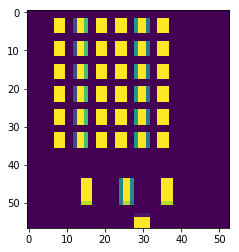

In [5]:
num_to_load = len(dataset)
split = int(num_to_load * 0.8)


x_train = dataset[0:split]
x_test = dataset[split:]

# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(219272, 3021)
(54819, 3021)


In [18]:
history = autoencoder.fit(x_train, x_train,
                epochs=80,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 108633 samples, validate on 27159 samples
Epoch 1/80
108633/108633 [==============================] - 133s 1ms/step - loss: 0.2973 - val_loss: 0.2332
Epoch 2/80
108633/108633 [==============================] - 130s 1ms/step - loss: 0.1718 - val_loss: 0.1586
Epoch 3/80
108633/108633 [==============================] - 131s 1ms/step - loss: 0.1209 - val_loss: 0.1421
Epoch 4/80
108633/108633 [==============================] - 130s 1ms/step - loss: 0.1023 - val_loss: 0.1433
Epoch 5/80
108633/108633 [==============================] - 131s 1ms/step - loss: 0.0926 - val_loss: 0.1341
Epoch 6/80
108633/108633 [==============================] - 131s 1ms/step - loss: 0.0868 - val_loss: 0.1354
Epoch 7/80
108633/108633 [==============================] - 131s 1ms/step - loss: 0.0820 - val_loss: 0.1286
Epoch 8/80
108633/108633 [==============================] - 131s 1ms/step - loss: 0.0767 - val_loss: 0.1275
Epoch 9/80
108633/108633 [==============================] - 131s 1ms/step - loss: 0.0

KeyboardInterrupt: 

In [17]:
history = []

for i in range(0, 5):
    print("start: {}".format(i))
    # this is our input placeholder
    input_img = Input(shape=(3021,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(1510, activation='relu')(input_img)
    encoded = Dense(755, activation='relu')(encoded)
    encoded = Dense(100, activation='relu')(encoded)

    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(755, activation='relu')(encoded)
    decoded = Dense(1510, activation='relu')(decoded)
    decoded = Dense(3021, activation='sigmoid')(decoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    print("training: {}".format(i))
    history.append(autoencoder.fit(x_train, x_train,
                                   epochs=25,
                                   batch_size=128,
                                   shuffle=True,
                                   validation_data=(x_test, x_test),
                                   verbose=0))
    print("done: {}".format(i))

start: 0
training: 0
done: 0
start: 1
training: 1
done: 1
start: 2
training: 2
done: 2
start: 3
training: 3
done: 3
start: 4
training: 4
done: 4


In [10]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


In [18]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

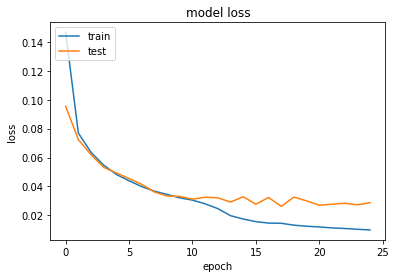

In [24]:
plot_history(history[4])

# Encode all images

In [1]:
from os import listdir, path, walk, path
import numpy as np
import h5py

data_path = '/media/andres/Baymax/transformed_data_2/'

from keras.models import load_model

model = load_model('/media/andres/Baymax/encoder100_6.h5')
paths = listdir(data_path)

for x in paths:
    print("loaded path: {}".format(x))
    current_path = path.join(data_path, x)
    h5f = h5py.File(current_path, 'r')
    data = h5f['space_invaders'][:]
    result = model.predict(data)
    print(result.shape)
    save_path = path.join('/media/andres/Baymax/encoded_100_6/', x)
    h5f = h5py.File(save_path)
    h5f.create_dataset('space_invaders', data=result)
    h5f.close()
    print("saved path: {}".format(save_path))


Using TensorFlow backend.
/home/andres/thesis_project/keras2/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


loaded path: space_invaders_1.h5
(1100, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_1.h5
loaded path: space_invaders_10.h5
(1426, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_10.h5
loaded path: space_invaders_101.h5
(4165, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_101.h5
loaded path: space_invaders_102.h5
(4749, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_102.h5
loaded path: space_invaders_103.h5
(3882, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_103.h5
loaded path: space_invaders_104.h5
(4897, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_104.h5
loaded path: space_invaders_105.h5
(3252, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_105.h5
loaded path: space_invaders_106.h5
(5055, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_106.h5
loaded path: space_invaders_107.h5
(7323, 100)
saved path: /media/andres/Bayma

(2732, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_90.h5
loaded path: space_invaders_93.h5
(3060, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_93.h5
loaded path: space_invaders_94.h5
(4300, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_94.h5
loaded path: space_invaders_95.h5
(4789, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_95.h5
loaded path: space_invaders_96.h5
(4863, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_96.h5
loaded path: space_invaders_114.h5
(3316, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_114.h5
loaded path: space_invaders_131.h5
(3970, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_131.h5
loaded path: space_invaders_150.h5
(3786, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_150.h5
loaded path: space_invaders_177.h5
(4648, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_177.h5


(5430, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_168.h5
loaded path: space_invaders_17.h5
(4000, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_17.h5
loaded path: space_invaders_178.h5
(3947, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_178.h5
loaded path: space_invaders_179.h5
(4227, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_179.h5
loaded path: space_invaders_180.h5
(3657, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_180.h5
loaded path: space_invaders_181.h5
(4852, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_181.h5
loaded path: space_invaders_182.h5
(4374, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_182.h5
loaded path: space_invaders_183.h5
(4601, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_183.h5
loaded path: space_invaders_186.h5
(322, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_1

(4798, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_267.h5
loaded path: space_invaders_268.h5
(4355, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_268.h5
loaded path: space_invaders_269.h5
(4561, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_269.h5
loaded path: space_invaders_27.h5
(458, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_27.h5
loaded path: space_invaders_270.h5
(3538, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_270.h5
loaded path: space_invaders_271.h5
(4012, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_271.h5
loaded path: space_invaders_273.h5
(3505, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_273.h5
loaded path: space_invaders_274.h5
(3978, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_274.h5
loaded path: space_invaders_275.h5
(5259, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_2

(3857, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_363.h5
loaded path: space_invaders_364.h5
(3662, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_364.h5
loaded path: space_invaders_365.h5
(3390, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_365.h5
loaded path: space_invaders_366.h5
(2309, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_366.h5
loaded path: space_invaders_367.h5
(4228, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_367.h5
loaded path: space_invaders_368.h5
(3546, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_368.h5
loaded path: space_invaders_369.h5
(3064, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_369.h5
loaded path: space_invaders_370.h5
(3351, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_370.h5
loaded path: space_invaders_371.h5
(1914, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invader

(3436, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_434.h5
loaded path: space_invaders_435.h5
(5178, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_435.h5
loaded path: space_invaders_436.h5
(5185, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_436.h5
loaded path: space_invaders_437.h5
(10254, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_437.h5
loaded path: space_invaders_438.h5
(6104, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_438.h5
loaded path: space_invaders_439.h5
(3387, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_439.h5
loaded path: space_invaders_44.h5
(2364, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_44.h5
loaded path: space_invaders_440.h5
(4050, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_440.h5
loaded path: space_invaders_441.h5
(4622, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders

# Classifier

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
# encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_array = Input(shape=(100,))
predictor = Dense(188, activation='relu')(input_array)
predictor = Dense(80, activation='tanh')(predictor)
predictor = Dense(18, activation='sigmoid')(predictor)

predictor_model = Model(input_array, predictor)
predictor_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

predictor_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 188)               18988     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                15120     
_________________________________________________________________
dense_6 (Dense)              (None, 18)                1458      
Total params: 35,566
Trainable params: 35,566
Non-trainable params: 0
_________________________________________________________________


# Load Encoded Images

In [2]:
from os import listdir, path, walk, path
import numpy as np
import h5py
import re

regex = re.compile('\d+')

data_path = '/media/andres/Baymax/encoded_100/'

paths = listdir(data_path)
numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
numbers.sort()
paths = ['{}{}{}'.format('space_invaders_', x, '.h5') for x in numbers]
x_dataset = np.zeros(shape=(0,100))
i = 0
for x in paths:
    print("loaded path: {}".format(x))
    data = path.join(data_path, x)
    h5f = h5py.File(data, 'r')
    x_dataset =  np.vstack([x_dataset, h5f['space_invaders'][:]])
    i = i + 1
    if i >= 400:
        break
print(x_dataset.shape)


loaded path: space_invaders_1.h5
loaded path: space_invaders_2.h5
loaded path: space_invaders_3.h5
loaded path: space_invaders_4.h5
loaded path: space_invaders_5.h5
loaded path: space_invaders_6.h5
loaded path: space_invaders_7.h5
loaded path: space_invaders_8.h5
loaded path: space_invaders_9.h5
loaded path: space_invaders_10.h5
loaded path: space_invaders_12.h5
loaded path: space_invaders_13.h5
loaded path: space_invaders_14.h5
loaded path: space_invaders_15.h5
loaded path: space_invaders_16.h5
loaded path: space_invaders_17.h5
loaded path: space_invaders_20.h5
loaded path: space_invaders_21.h5
loaded path: space_invaders_22.h5
loaded path: space_invaders_23.h5
loaded path: space_invaders_27.h5
loaded path: space_invaders_32.h5
loaded path: space_invaders_33.h5
loaded path: space_invaders_34.h5
loaded path: space_invaders_35.h5
loaded path: space_invaders_36.h5
loaded path: space_invaders_37.h5
loaded path: space_invaders_38.h5
loaded path: space_invaders_39.h5
loaded path: space_inva

loaded path: space_invaders_305.h5
loaded path: space_invaders_306.h5
loaded path: space_invaders_308.h5
loaded path: space_invaders_309.h5
loaded path: space_invaders_310.h5
loaded path: space_invaders_311.h5
loaded path: space_invaders_312.h5
loaded path: space_invaders_313.h5
loaded path: space_invaders_314.h5
loaded path: space_invaders_315.h5
loaded path: space_invaders_316.h5
loaded path: space_invaders_317.h5
loaded path: space_invaders_318.h5
loaded path: space_invaders_319.h5
loaded path: space_invaders_322.h5
loaded path: space_invaders_323.h5
loaded path: space_invaders_324.h5
loaded path: space_invaders_325.h5
loaded path: space_invaders_327.h5
loaded path: space_invaders_328.h5
loaded path: space_invaders_329.h5
loaded path: space_invaders_330.h5
loaded path: space_invaders_331.h5
loaded path: space_invaders_332.h5
loaded path: space_invaders_333.h5
loaded path: space_invaders_334.h5
loaded path: space_invaders_335.h5
loaded path: space_invaders_336.h5
loaded path: space_i

In [4]:
import pandas as pd
import os
regex = re.compile('\d+')

data_path = '/media/andres/Data/spaceinvaders/atari_v1/trajectories/spaceinvaders'

paths = listdir(data_path)
numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
numbers.sort()
paths = ['{}.txt'.format(x, '.txt') for x in numbers]
y_dataset = np.zeros(shape=(0,18))
i = 0
for x in paths:
    print("loaded path: {}".format(x))
    full_path = os.path.join(data_path, x)
    data = pd.read_csv(full_path, skiprows=1)
    data.columns = ['frame', 'reward', 'score', 'terminal', 'action']
    a = data['action'].values
    b = np.zeros((a.size, 18))
    b[np.arange(a.size), a] = 1
    y_dataset = np.vstack([y_dataset, b])
    i = i + 1
    if i >= 400:
        break
print(y_dataset.shape)

loaded path: 1.txt
loaded path: 2.txt
loaded path: 3.txt
loaded path: 4.txt
loaded path: 5.txt
loaded path: 6.txt
loaded path: 7.txt
loaded path: 8.txt
loaded path: 9.txt
loaded path: 10.txt
loaded path: 12.txt
loaded path: 13.txt
loaded path: 14.txt
loaded path: 15.txt
loaded path: 16.txt
loaded path: 17.txt
loaded path: 20.txt
loaded path: 21.txt
loaded path: 22.txt
loaded path: 23.txt
loaded path: 27.txt
loaded path: 32.txt
loaded path: 33.txt
loaded path: 34.txt
loaded path: 35.txt
loaded path: 36.txt
loaded path: 37.txt
loaded path: 38.txt
loaded path: 39.txt
loaded path: 40.txt
loaded path: 41.txt
loaded path: 42.txt
loaded path: 43.txt
loaded path: 44.txt
loaded path: 45.txt
loaded path: 46.txt
loaded path: 48.txt
loaded path: 49.txt
loaded path: 50.txt
loaded path: 51.txt
loaded path: 52.txt
loaded path: 53.txt
loaded path: 54.txt
loaded path: 55.txt
loaded path: 56.txt
loaded path: 57.txt
loaded path: 58.txt
loaded path: 59.txt
loaded path: 60.txt
loaded path: 61.txt
loaded pa

loaded path: 482.txt
loaded path: 483.txt
loaded path: 484.txt
loaded path: 485.txt
(1679740, 18)


In [5]:
dataset = np.concatenate((x_dataset, y_dataset), axis=1)
dataset = dataset[dataset[:,100]!=1]

In [38]:
x_dataset[1]

array([5.25782805e-03, 1.79293447e-04, 2.19395396e-03, 0.00000000e+00,
       0.00000000e+00, 3.71869074e-03, 4.42519316e-04, 4.49822946e-03,
       0.00000000e+00, 2.65783479e-04, 0.00000000e+00, 9.66739245e-04,
       0.00000000e+00, 0.00000000e+00, 1.15660103e-02, 0.00000000e+00,
       6.03166821e-03, 1.73099263e-03, 4.04719723e-04, 0.00000000e+00,
       3.48786752e-04, 2.33124161e-03, 4.11155092e-03, 2.14975565e-03,
       1.25341617e-02, 4.11921235e-04, 8.37739723e-03, 5.75857714e-03,
       0.00000000e+00, 1.28161616e-03, 0.00000000e+00, 1.91045681e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.41570949e-04,
       3.34665024e-03, 2.11503599e-03, 1.56707564e-03, 1.57566155e-03,
       6.06701244e-03, 4.61040022e-04, 4.01883963e-03, 0.00000000e+00,
       3.24376944e-03, 3.85077608e-03, 2.35307400e-03, 2.78725517e-04,
       0.00000000e+00, 1.94225793e-03, 9.29612568e-04, 6.65205757e-03,
       3.53520184e-03, 2.07135721e-03, 7.22752495e-03, 3.44874429e-03,
      

In [6]:
datasets = np.split(dataset, [0,100], axis=1)
datasets[2].shape

x_dataset = datasets[1]
y_dataset = datasets[2]

for i in range(0, len(x_dataset)):
    x_dataset[i] = x_dataset[i]/x_dataset[i].sum()

x_dataset.shape

(885325, 100)

In [7]:
num_to_load = len(x_dataset)
split = int(num_to_load * 0.8)


x_train = x_dataset[0:split]
y_train = y_dataset[0:split]
x_test = x_dataset[split:]
y_test = y_dataset[split:]

# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#print(x_train.shape)
#print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(708260, 18)
(177065, 18)


In [10]:
predictor_model.fit(x_train, y_train,
                epochs=40,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, y_test))

Train on 708260 samples, validate on 177065 samples
Epoch 1/40
708260/708260 [==============================] - 24s 34us/step - loss: 1.2783 - acc: 0.4016 - val_loss: 1.2600 - val_acc: 0.4289
Epoch 2/40
708260/708260 [==============================] - 24s 33us/step - loss: 1.2224 - acc: 0.4608 - val_loss: 1.2386 - val_acc: 0.4525
Epoch 3/40
708260/708260 [==============================] - 24s 34us/step - loss: 1.1945 - acc: 0.4833 - val_loss: 1.2420 - val_acc: 0.4534
Epoch 4/40
708260/708260 [==============================] - 24s 33us/step - loss: 1.1766 - acc: 0.4948 - val_loss: 1.2293 - val_acc: 0.4632
Epoch 5/40
708260/708260 [==============================] - 24s 34us/step - loss: 1.1635 - acc: 0.5024 - val_loss: 1.2305 - val_acc: 0.4635
Epoch 6/40
708260/708260 [==============================] - 24s 34us/step - loss: 1.1531 - acc: 0.5081 - val_loss: 1.2345 - val_acc: 0.4682
Epoch 7/40
708260/708260 [==============================] - 24s 34us/step - loss: 1.1442 - acc: 0.5128 - val

In [11]:
predictor_model.save('/media/andres/Baymax/predictor_6.h5')

In [18]:


result = predictor_model.predict(np.array(x_test[0]))

print(result[0].argmax())
print(result[0])
print(result[0][result[0].argmax()])
print(result[0].max())

ValueError: Error when checking input: expected input_1 to have shape (100,) but got array with shape (1,)

In [ ]:
for i in to_remove:
    y_dataset = np.delete(y_dataset, i)
    x_dataset = np.delete(x_dataset, i)

In [14]:
import heapq

misses = 0
hits = 0

for i in range(0, len(result)):
    test = heapq.nlargest(3, range(0,len(result[i])), key=result[i].__getitem__)
    if y_test[i][test[0]] == 1 or y_test[i][test[1]] == 1 or y_test[i][test[2]] == 1:
        hits = hits + 1
    else:
        misses = misses + 1
        
print("hits: {}".format(hits))
print("misses: {}".format(misses))
print("precission: {}".format(hits/(hits+misses)))

hits: 162154
misses: 14911
precission: 0.9157879874622313


In [7]:
total = len(y_dataset)
for i in range(0, 18):
    count = 0
    for y in y_dataset:
        if y[i] == 1:
            count = count + 1
    print("total samples of class {}: {} - {:.2f}%".format(i, count, (count/total)*100))

total samples of class 0: 0 - 0.00%
total samples of class 1: 91671 - 27.99%
total samples of class 2: 404 - 0.12%
total samples of class 3: 121747 - 37.18%
total samples of class 4: 93824 - 28.65%
total samples of class 5: 106 - 0.03%
total samples of class 6: 52 - 0.02%
total samples of class 7: 30 - 0.01%
total samples of class 8: 25 - 0.01%
total samples of class 9: 6 - 0.00%
total samples of class 10: 23 - 0.01%
total samples of class 11: 11186 - 3.42%
total samples of class 12: 8363 - 2.55%
total samples of class 13: 1 - 0.00%
total samples of class 14: 0 - 0.00%
total samples of class 15: 0 - 0.00%
total samples of class 16: 58 - 0.02%
total samples of class 17: 0 - 0.00%


In [8]:
total = len(y_train)
for i in range(0, 18):
    count = 0
    for y in y_train:
        if y[i] == 1:
            count = count + 1
    print("total samples of class {}: {} - {:.2f}%".format(i, count, (count/total)*100))

total samples of class 0: 0 - 0.00%
total samples of class 1: 71261 - 27.20%
total samples of class 2: 348 - 0.13%
total samples of class 3: 98568 - 37.62%
total samples of class 4: 75975 - 29.00%
total samples of class 5: 79 - 0.03%
total samples of class 6: 50 - 0.02%
total samples of class 7: 30 - 0.01%
total samples of class 8: 18 - 0.01%
total samples of class 9: 6 - 0.00%
total samples of class 10: 5 - 0.00%
total samples of class 11: 8966 - 3.42%
total samples of class 12: 6631 - 2.53%
total samples of class 13: 1 - 0.00%
total samples of class 14: 0 - 0.00%
total samples of class 15: 0 - 0.00%
total samples of class 16: 58 - 0.02%
total samples of class 17: 0 - 0.00%


In [19]:
total = len(y_test)
for i in range(0, 18):
    count = 0
    for y in y_test:
        if y[i] == 1:
            count = count + 1
    print("total samples of class {}: {} - {:.2f}%".format(i, count, (count/total)*100))

total samples of class 0: 166017 - 47.00%
total samples of class 1: 60981 - 17.26%
total samples of class 2: 105 - 0.03%
total samples of class 3: 64044 - 18.13%
total samples of class 4: 48614 - 13.76%
total samples of class 5: 27 - 0.01%
total samples of class 6: 24 - 0.01%
total samples of class 7: 2 - 0.00%
total samples of class 8: 15 - 0.00%
total samples of class 9: 1 - 0.00%
total samples of class 10: 0 - 0.00%
total samples of class 11: 7898 - 2.24%
total samples of class 12: 5485 - 1.55%
total samples of class 13: 3 - 0.00%
total samples of class 14: 0 - 0.00%
total samples of class 15: 0 - 0.00%
total samples of class 16: 0 - 0.00%
total samples of class 17: 0 - 0.00%


In [52]:
len(sequence_train.paths) + len(sequence_validation.paths)

1766078

In [ ]:
autoencoder.fit_generator(generator=sequence_train, 
                          epochs=80,
                          validation_data=sequence_validation,
                          max_queue_size=10,
                          workers=4,
                          use_multiprocessing=True)


Epoch 1/80


/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transf

  12/1379 [..............................] - ETA: 17:10:05 - loss: 0.6909

In [17]:
predictor_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 377)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 188)               71064     
_________________________________________________________________
dense_2 (Dense)              (None, 47)                8883      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                864       
Total params: 80,811
Trainable params: 80,811
Non-trainable params: 0
_________________________________________________________________


In [74]:
len(a)

377

In [3]:
import numpy as np
from random import randint
train_x = np.random.rand(10000,377)
train_y = np.zeros((10000, 18))

In [4]:
for row in train_y:
    row[0] = 1

In [77]:
train_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
predictor_model.fit(train_x, train_y,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(train_x, train_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 190us/step - loss: 8.8349e-04 - val_loss: 1.6077e-06
Epoch 2/50
10000/10000 [==============================] - 2s 175us/step - loss: 1.0824e-06 - val_loss: 7.6943e-07
Epoch 3/50
10000/10000 [==============================] - 2s 174us/step - loss: 6.2807e-07 - val_loss: 5.2232e-07
Epoch 4/50
10000/10000 [==============================] - 2s 180us/step - loss: 4.5799e-07 - val_loss: 4.0547e-07
Epoch 5/50
10000/10000 [==============================] - 2s 171us/step - loss: 3.6890e-07 - val_loss: 3.3763e-07
Epoch 6/50
10000/10000 [==============================] - 2s 175us/step - loss: 3.1426e-07 - val_loss: 2.9366e-07
Epoch 7/50
10000/10000 [==============================] - 2s 172us/step - loss: 2.7738e-07 - val_loss: 2.6272e-07
Epoch 8/50
10000/10000 [==============================] - 2s 166us/step - loss: 2.5080e-07 - val_loss: 2.3994e-07
Epoch 9/50
10000/10000 [==============

In [12]:
result = predictor_model.predict(train_x)

In [13]:
result[0]

array([ 0.9999999 , -0.52402663, -0.78376174, -0.99066645, -0.82346517,
       -0.7911382 , -0.8860826 , -0.8925584 , -0.86585486, -0.7716998 ,
       -0.9347379 , -0.7225369 , -0.9952648 , -0.46945217, -0.9444944 ,
       -0.92316824, -0.9827192 , -0.8370023 ], dtype=float32)

In [54]:
train_y[0]

array([11.])

In [29]:
a

array([0.96464172, 0.0374102 , 0.06367769, 0.43808396, 0.33149993,
       0.6639806 , 0.89277104, 0.67845068, 0.3646353 , 0.25952953,
       0.26613748, 0.35238901, 0.64176481, 0.45047746, 0.56789687,
       0.00919414, 0.1303084 , 0.72539952, 0.3321035 , 0.88052515,
       0.34029707, 0.50018285, 0.2087765 , 0.26215716, 0.22870178,
       0.23009559, 0.45292584, 0.70454599, 0.87002428, 0.34197075,
       0.13441189, 0.22718142, 0.71868584, 0.33989796, 0.54064392,
       0.87639121, 0.8484391 , 0.67377135, 0.57060809, 0.68338729,
       0.02014656, 0.47815473, 0.92303769, 0.24825419, 0.27910188,
       0.79125838, 0.51276072, 0.21473458, 0.6918284 , 0.55021233,
       0.2991266 , 0.53690291, 0.50489642, 0.80614165, 0.79154076,
       0.15664683, 0.02441173, 0.93479568, 0.53164814, 0.26176709,
       0.25848321, 0.16895805, 0.55590089, 0.13986689, 0.86039142,
       0.14204966, 0.79149357, 0.79116753, 0.57280507, 0.35333719,
       0.58120717, 0.22440114, 0.37798431, 0.5543642 , 0.29560

In [21]:
len(['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE'])

18

In [28]:
result = autoencoder.predict(np.expand_dims(dataset[200], axis=0))[0]

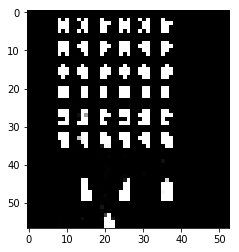

In [29]:
plt.imshow(result.reshape(57, 53), cmap=cm.gray)

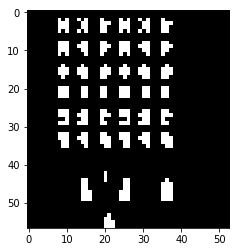

In [30]:
plt.imshow(dataset[200].reshape(57, 53), cmap=cm.gray)

In [30]:
b

array([[1, 0, 0],
       [0, 1, 0]])

In [36]:
result = np.concatenate((a,b), axis=1)

In [52]:
result[result[:,3]!=1]

array([[1, 2, 3, 0, 1, 0]])

In [42]:
a[a[:,0] > 3]

[[ 1  0  5  7  8]
 [11 13 15 17 18]]
